In [3]:
# # подключение к Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # распаковка архива
# import zipfile
# import os

# # Путь к ZIP-архиву на Google Drive
# zip_path = '/content/drive/MyDrive/Data_Science/archive (3).zip'  # Замените на свой путь

# # Папка, куда распаковывать (можно создать новую)
# images = '/content/drive/MyDrive/Data_Science/image/'

# # Создаем папку, если её нет
# os.makedirs(images, exist_ok=True)

# # Распаковка
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(images)

# print(f"Архив распакован в: {images}")

Архив распакован в: /content/drive/MyDrive/Data_Science/image/


In [4]:
import torch  # Добавьте эту строку

# Определение устройства (GPU если доступно, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

Используется устройство: cpu


In [1]:
# подключение к Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Путь к папке с изображениями на Google Drive
dataset_path = '/content/drive/MyDrive/Data_Science/image/img_align_celeba/img_align_celeba'
image_files = os.listdir(dataset_path)[:10]  # Первые 10 файлов


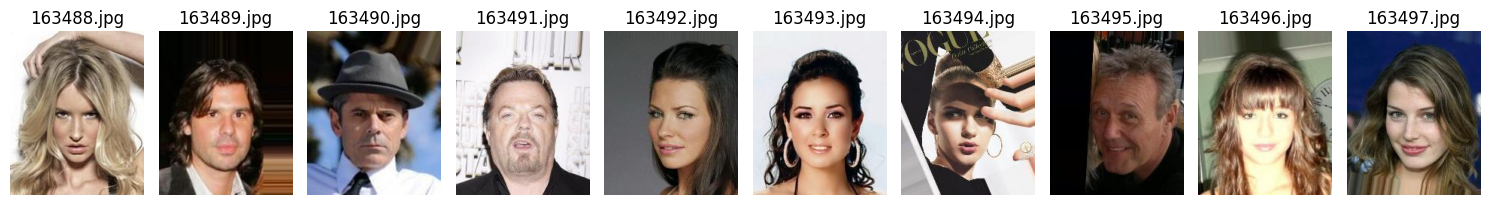

In [3]:
# просмотр первых 10 изображений
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, img_file in enumerate(image_files, 1):
    img_path = os.path.join(dataset_path, img_file)
    try:
        img = Image.open(img_path)
        plt.subplot(1, 10, i)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

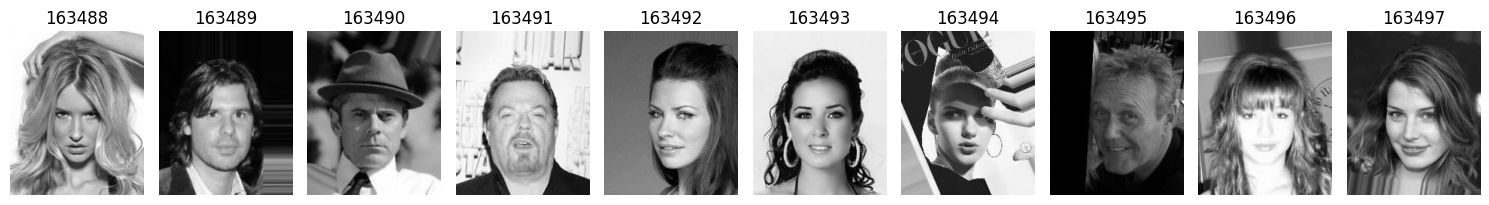

In [4]:
# Просмотр первых 10 изображений в черно-белом формате
from PIL import Image
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(15, 5))
for i, img_file in enumerate(image_files[:10], 1):  # Берем только первые 10 файлов
    img_path = os.path.join(dataset_path, img_file)
    try:
        img = Image.open(img_path).convert('L')  # Конвертируем в grayscale
        plt.subplot(1, 10, i)
        plt.imshow(img, cmap='gray')  # Указываем цветовую карту 'gray'
        plt.title(os.path.splitext(img_file)[0])  # Показываем имя файла без расширения
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

In [7]:
# # сокращение датасета до 10 000 изображений и их конвертация в черно-белый формат, сохранение в новый датасет на google drive (увеличить количество изображений до 30 000)
# import os
# from PIL import Image
# import shutil
# from tqdm import tqdm

# # Пути
# original_dataset_path = '/content/drive/MyDrive/Data_Science/image/img_align_celeba/img_align_celeba'
# # new_dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_10k'  # Новая папка для ЧБ изображений
# # new_dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_20k'  # Новая папка для ЧБ изображений
# new_dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_30k'  # Новая папка для ЧБ изображений

# # Создаем новую директорию, если ее нет
# os.makedirs(new_dataset_path, exist_ok=True)

# # # Получаем список всех файлов (первые 10 000)
# # all_files = os.listdir(original_dataset_path)[:10000]

# # Получаем список всех файлов (первые 20 000)
# # all_files = os.listdir(original_dataset_path)[:20000]

# # Получаем список всех файлов (первые 30 000)
# all_files = os.listdir(original_dataset_path)[:30000]


# # Обрабатываем и сохраняем изображения
# for filename in tqdm(all_files, desc='Converting to BW'):
#     try:
#         # Открываем и конвертируем в ЧБ
#         img_path = os.path.join(original_dataset_path, filename)
#         img = Image.open(img_path).convert('L')

#         # Сохраняем в новую папку
#         new_img_path = os.path.join(new_dataset_path, filename)
#         img.save(new_img_path)

#     except Exception as e:
#         print(f"Error processing {filename}: {e}")

# print(f"\nSuccessfully converted and saved {len(os.listdir(new_dataset_path))} BW images to {new_dataset_path}")

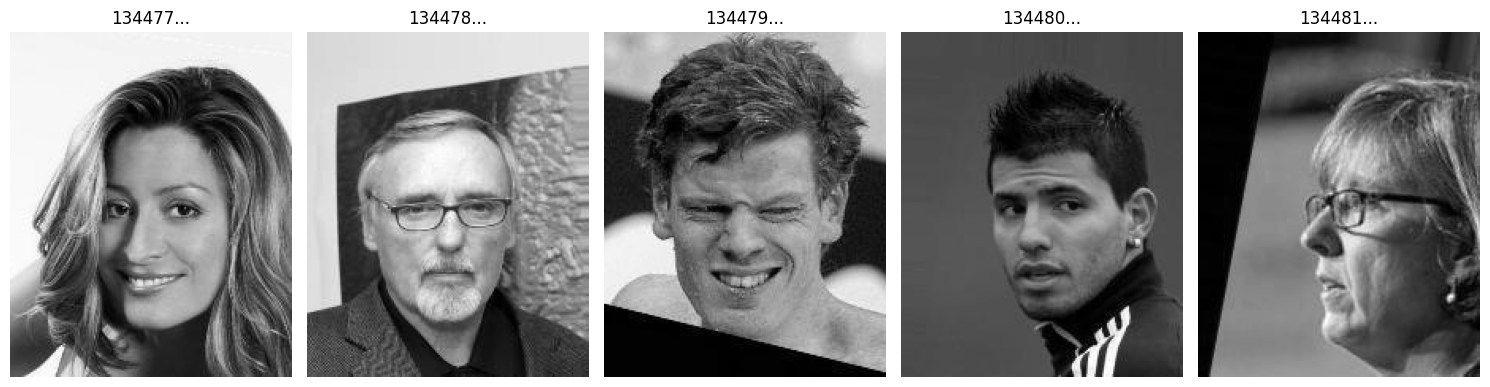

In [6]:
# Проверяем первые 5 изображений из нового датасета
new_image_files = os.listdir(new_dataset_path)[:5]

plt.figure(figsize=(15, 5))
for i, img_file in enumerate(new_image_files, 1):
    img_path = os.path.join(new_dataset_path, img_file)
    try:
        img = Image.open(img_path)
        plt.subplot(1, 5, i)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.splitext(img_file)[0][:10] + "...")
        plt.axis('off')
    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")

plt.tight_layout()
plt.show()

Изображение 134477.jpg: размер = (178, 218), режим = L
Изображение 134478.jpg: размер = (178, 218), режим = L
Изображение 134479.jpg: размер = (178, 218), режим = L
Изображение 134480.jpg: размер = (178, 218), режим = L
Изображение 134481.jpg: размер = (178, 218), режим = L


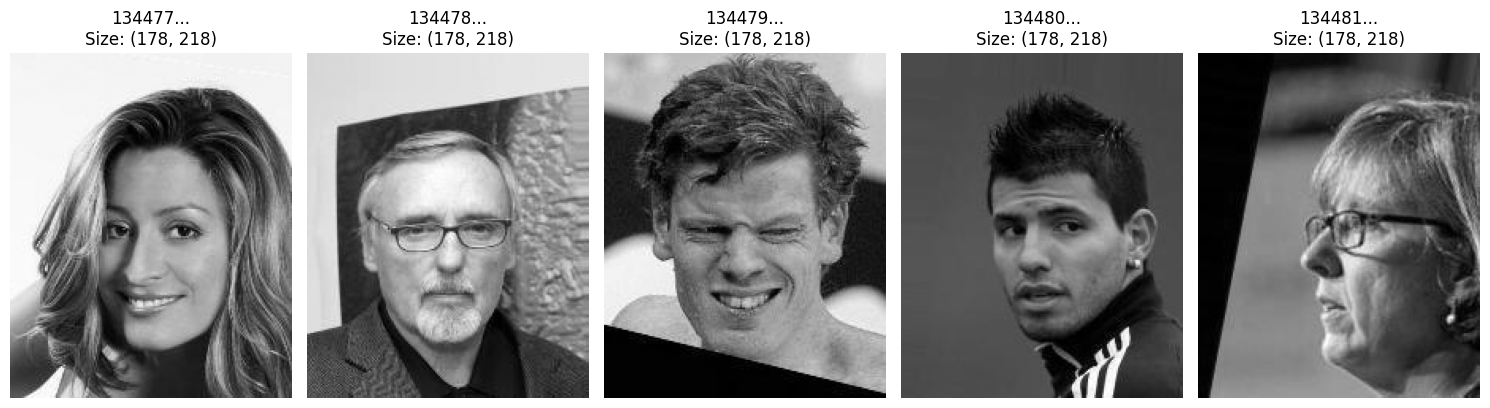

In [8]:
#  вывести 5 изображений + ражмер изображений
import os
from PIL import Image
import matplotlib.pyplot as plt

# Путь к датасету
# new_dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_30k'

# Проверяем первые 5 изображений из датасета
new_image_files = os.listdir(new_dataset_path)[:5]

plt.figure(figsize=(15, 5))
for i, img_file in enumerate(new_image_files, 1):
    img_path = os.path.join(new_dataset_path, img_file)
    try:
        img = Image.open(img_path)

        # Добавляем информацию о размере в заголовок
        plt.subplot(1, 5, i)
        plt.imshow(img, cmap='gray')
        plt.title(f"{os.path.splitext(img_file)[0][:10]}...\nSize: {img.size}")
        plt.axis('off')

        # Выводим размер в консоль для точности
        print(f"Изображение {img_file}: размер = {img.size}, режим = {img.mode}")

    except Exception as e:
        print(f"Ошибка при загрузке {img_file}: {e}")
        plt.subplot(1, 5, i)
        plt.text(0.5, 0.5, f"Error\n{img_file}", ha='center', va='center')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# проверка изображений на наличие ошибок
import os
from PIL import Image
from tqdm import tqdm
from torchvision import transforms  # Добавьте этот импорт

def validate_dataset(dataset_path, num_samples=None):
    """Проверяет датасет на целостность файлов и соответствие форматов"""
    files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.jpg', '.png'))]
    if num_samples:
        files = files[:num_samples]

    errors = []
    valid_count = 0

    transform = transforms.ToTensor()  # Создайте объект transform

    for file in tqdm(files, desc="Проверка изображений"):
        try:
            img_path = os.path.join(dataset_path, file)
            with Image.open(img_path) as img:
                # Проверка режима изображения (должен быть 'L' для ч/б)
                if img.mode != 'L':
                    errors.append(f"{file}: не ч/б (режим {img.mode})")

                # Проверка размера
                # if img.size != (48, 48):
                if img.size != (178, 218):
                    errors.append(f"{file}: неверный размер {img.size}")

                # Попытка конвертации в тензор
                img_tensor = transform(img)  # Используйте созданный transform
                if img_tensor.dim() != 3 or img_tensor.shape[0] != 1:
                    errors.append(f"{file}: неверная форма тензора {img_tensor.shape}")

            valid_count += 1
        except Exception as e:
            errors.append(f"{file}: ошибка загрузки - {str(e)}")

    print(f"\nРезультаты проверки ({len(files)} файлов):")
    print(f"Корректных: {valid_count}")
    print(f"Ошибок: {len(errors)}")

    if errors:
        print("\nПервые 5 ошибок:")
        for error in errors[:5]:
            print(error)

    return errors

# Использование
dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_30k'
errors = validate_dataset(dataset_path, num_samples=1000)  # Проверить первые 1000 изображений

Проверка изображений: 100%|██████████| 1000/1000 [03:48<00:00,  4.38it/s]


Результаты проверки (1000 файлов):
Корректных: 1000
Ошибок: 0


Используется 2 CPU ядер
Проверка первых 5 изображений...


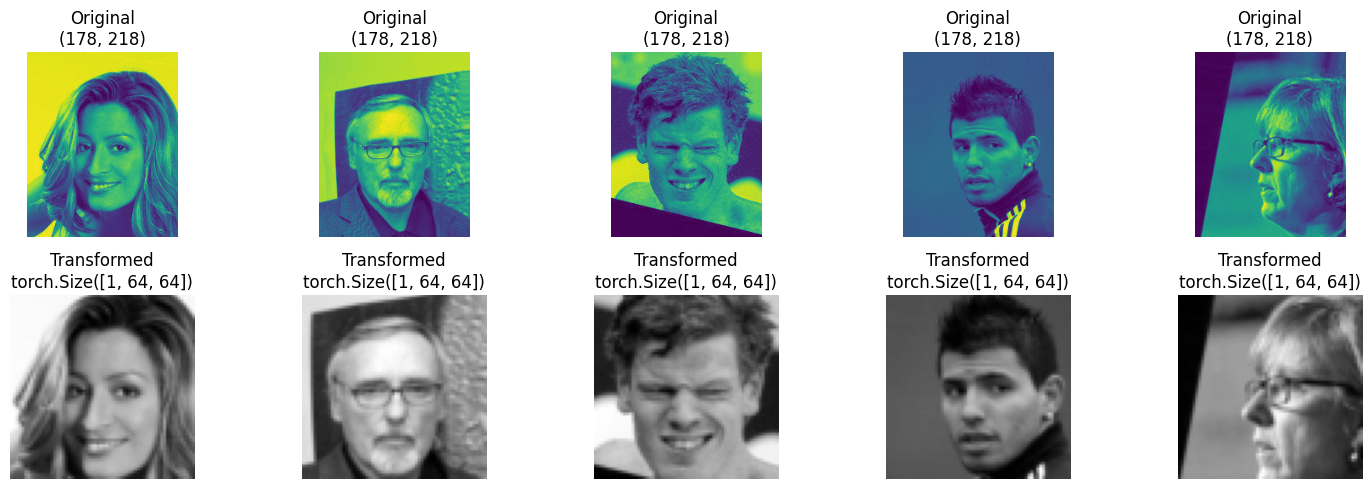

Проверка первых 5 изображений...


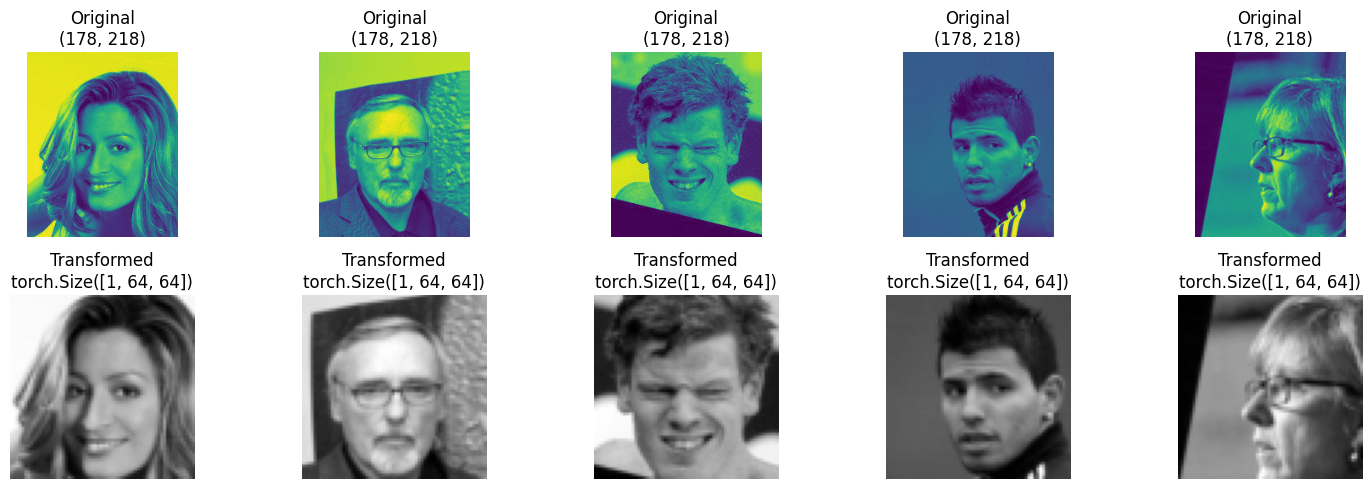

Epoch 1: 100%|██████████| 375/375 [08:52<00:00,  1.42s/it]

Epoch: 1, Average Loss: 443.8508


Test Epoch: 1, Average Loss: 294.3923
Новая лучшая модель сохранена с loss: 294.3923


Epoch 2: 100%|██████████| 375/375 [06:59<00:00,  1.12s/it]

Epoch: 2, Average Loss: 280.0372


Test Epoch: 2, Average Loss: 259.1825
Новая лучшая модель сохранена с loss: 259.1825


Epoch 3: 100%|██████████| 375/375 [06:50<00:00,  1.09s/it]

Epoch: 3, Average Loss: 254.6224


Test Epoch: 3, Average Loss: 237.5707
Новая лучшая модель сохранена с loss: 237.5707


Epoch 4: 100%|██████████| 375/375 [06:49<00:00,  1.09s/it]

Epoch: 4, Average Loss: 231.5151


Test Epoch: 4, Average Loss: 215.8256
Новая лучшая модель сохранена с loss: 215.8256


Epoch 5: 100%|██████████| 375/375 [06:50<00:00,  1.09s/it]

Epoch: 5, Average Loss: 213.3022


Test Epoch: 5, Average Loss: 200.7259
Новая лучшая модель сохранена с loss: 200.7259


Epoch 6: 100%|██████████| 375/375 [06:49<00:00,  1.09s/it]

Epoch: 6, Average Loss: 200.3764


Test Epoch: 6, Average Loss: 192.0517
Новая лучшая модель сохранена с loss: 192.0517


Epoch 7: 100%|██████████| 375/375 [06:49<00:00,  1.09s/it]

Epoch: 7, Average Loss: 191.3742


Test Epoch: 7, Average Loss: 184.5456
Новая лучшая модель сохранена с loss: 184.5456


Epoch 8: 100%|██████████| 375/375 [06:45<00:00,  1.08s/it]

Epoch: 8, Average Loss: 185.4390


Test Epoch: 8, Average Loss: 176.5770
Новая лучшая модель сохранена с loss: 176.5770


Epoch 9: 100%|██████████| 375/375 [06:46<00:00,  1.08s/it]

Epoch: 9, Average Loss: 179.1763


Test Epoch: 9, Average Loss: 172.7213
Новая лучшая модель сохранена с loss: 172.7213


Epoch 10: 100%|██████████| 375/375 [06:46<00:00,  1.08s/it]

Epoch: 10, Average Loss: 175.3587


Test Epoch: 10, Average Loss: 168.6484
Новая лучшая модель сохранена с loss: 168.6484


Epoch 11: 100%|██████████| 375/375 [06:48<00:00,  1.09s/it]

Epoch: 11, Average Loss: 171.5889


Test Epoch: 11, Average Loss: 168.3472
Новая лучшая модель сохранена с loss: 168.3472


Epoch 12: 100%|██████████| 375/375 [06:44<00:00,  1.08s/it]

Epoch: 12, Average Loss: 168.7679


Test Epoch: 12, Average Loss: 167.1614
Новая лучшая модель сохранена с loss: 167.1614


Epoch 13: 100%|██████████| 375/375 [06:46<00:00,  1.08s/it]

Epoch: 13, Average Loss: 166.9912


Test Epoch: 13, Average Loss: 166.1036
Новая лучшая модель сохранена с loss: 166.1036


Epoch 14: 100%|██████████| 375/375 [06:46<00:00,  1.08s/it]

Epoch: 14, Average Loss: 164.9392


Test Epoch: 14, Average Loss: 161.8568
Новая лучшая модель сохранена с loss: 161.8568


Epoch 15: 100%|██████████| 375/375 [06:54<00:00,  1.11s/it]

Epoch: 15, Average Loss: 163.1809


Test Epoch: 15, Average Loss: 158.8501
Новая лучшая модель сохранена с loss: 158.8501


Epoch 16: 100%|██████████| 375/375 [06:48<00:00,  1.09s/it]

Epoch: 16, Average Loss: 161.3780


Test Epoch: 16, Average Loss: 157.8318
Новая лучшая модель сохранена с loss: 157.8318


Epoch 17: 100%|██████████| 375/375 [06:44<00:00,  1.08s/it]

Epoch: 17, Average Loss: 159.6446


Test Epoch: 17, Average Loss: 155.9102
Новая лучшая модель сохранена с loss: 155.9102


Epoch 18: 100%|██████████| 375/375 [06:48<00:00,  1.09s/it]

Epoch: 18, Average Loss: 158.1883


Test Epoch: 18, Average Loss: 155.1164
Новая лучшая модель сохранена с loss: 155.1164


Epoch 19: 100%|██████████| 375/375 [06:52<00:00,  1.10s/it]

Epoch: 19, Average Loss: 157.1897


Test Epoch: 19, Average Loss: 155.0627
Новая лучшая модель сохранена с loss: 155.0627


Epoch 20: 100%|██████████| 375/375 [06:46<00:00,  1.08s/it]

Epoch: 20, Average Loss: 156.3190


Test Epoch: 20, Average Loss: 153.1026
Новая лучшая модель сохранена с loss: 153.1026


Epoch 21: 100%|██████████| 375/375 [07:32<00:00,  1.21s/it]

Epoch: 21, Average Loss: 154.6845


Test Epoch: 21, Average Loss: 151.4584
Новая лучшая модель сохранена с loss: 151.4584


Epoch 22: 100%|██████████| 375/375 [06:49<00:00,  1.09s/it]

Epoch: 22, Average Loss: 153.8516


Test Epoch: 22, Average Loss: 150.7138
Новая лучшая модель сохранена с loss: 150.7138


Epoch 23: 100%|██████████| 375/375 [06:51<00:00,  1.10s/it]

Epoch: 23, Average Loss: 153.0950


Test Epoch: 23, Average Loss: 151.2780


Epoch 24: 100%|██████████| 375/375 [06:52<00:00,  1.10s/it]

Epoch: 24, Average Loss: 152.3652


Test Epoch: 24, Average Loss: 149.1233
Новая лучшая модель сохранена с loss: 149.1233


Epoch 25: 100%|██████████| 375/375 [06:49<00:00,  1.09s/it]

Epoch: 25, Average Loss: 151.3319


Test Epoch: 25, Average Loss: 149.6372


Epoch 26: 100%|██████████| 375/375 [06:51<00:00,  1.10s/it]

Epoch: 26, Average Loss: 151.2090


Test Epoch: 26, Average Loss: 148.1397
Новая лучшая модель сохранена с loss: 148.1397


Epoch 27: 100%|██████████| 375/375 [06:48<00:00,  1.09s/it]

Epoch: 27, Average Loss: 150.0911


Test Epoch: 27, Average Loss: 148.0589
Новая лучшая модель сохранена с loss: 148.0589


Epoch 28: 100%|██████████| 375/375 [06:46<00:00,  1.09s/it]

Epoch: 28, Average Loss: 149.9462


Test Epoch: 28, Average Loss: 147.3003
Новая лучшая модель сохранена с loss: 147.3003


Epoch 29: 100%|██████████| 375/375 [06:53<00:00,  1.10s/it]

Epoch: 29, Average Loss: 149.0240


Test Epoch: 29, Average Loss: 146.7293
Новая лучшая модель сохранена с loss: 146.7293


Epoch 30: 100%|██████████| 375/375 [06:51<00:00,  1.10s/it]

Epoch: 30, Average Loss: 148.4125


Test Epoch: 30, Average Loss: 146.6537
Новая лучшая модель сохранена с loss: 146.6537


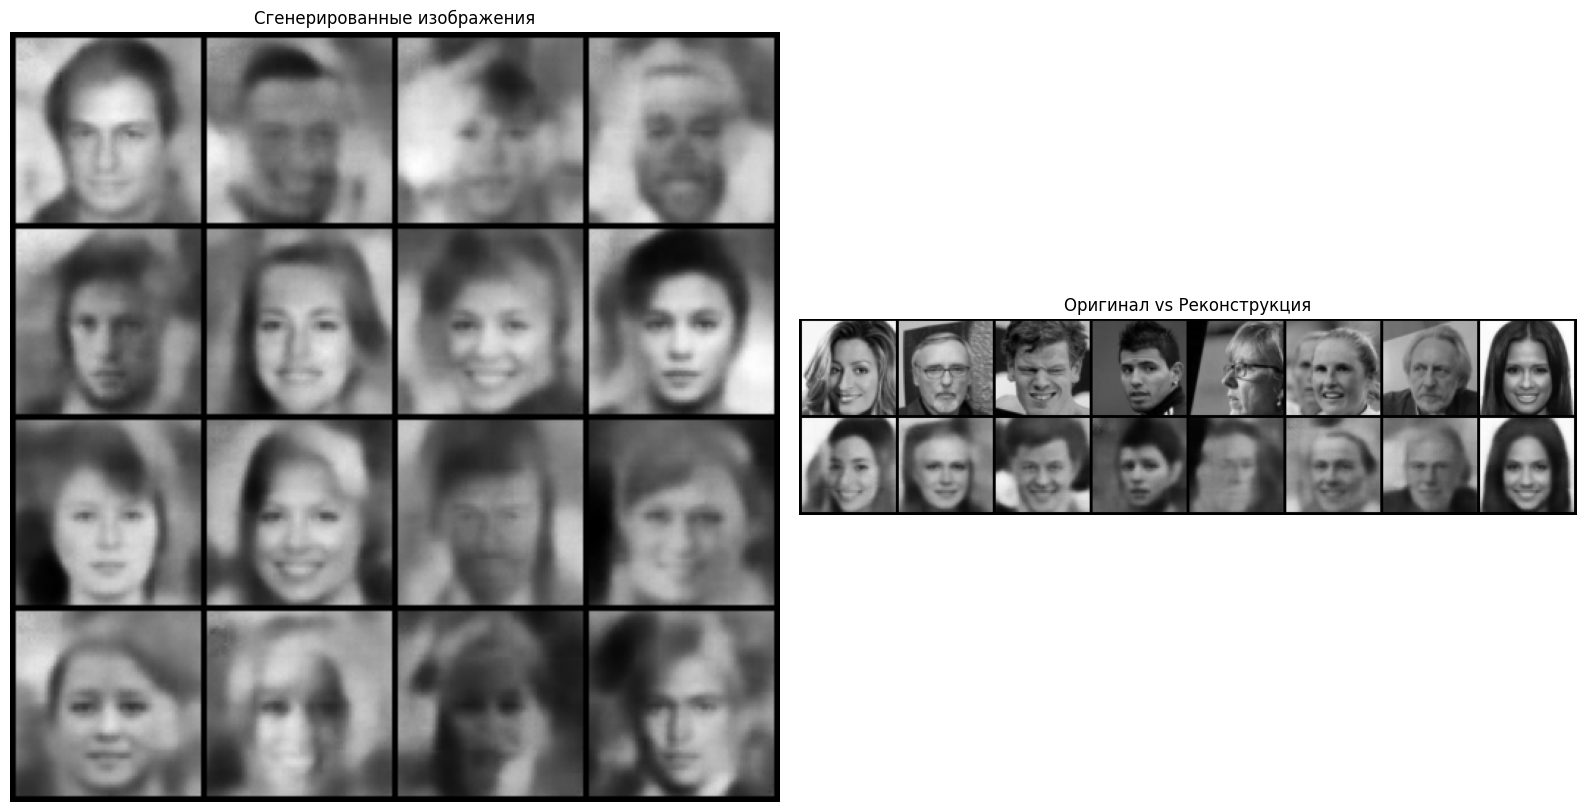

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from PIL import Image
import os
from google.colab import drive
from tqdm import tqdm

# 1. Настройка окружения
torch.set_num_threads(2)
print(f"Используется {torch.get_num_threads()} CPU ядер")

# 2. Монтирование Google Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 3. Параметры
original_height, original_width = 218, 178
target_size = 64
batch_size = 64
latent_dim = 1024
epochs = 30 #160
learning_rate = 3e-4
patience = 5

# 4. Преобразования для изображений
transform = transforms.Compose([
    transforms.Resize(256),  # Увеличиваем меньшую сторону до 256
    transforms.CenterCrop(224),  # Квадратное изображение
    transforms.Resize(target_size),  # Финальный размер
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Класс датасета с проверкой изображений
class FastCelebADataset(Dataset):
    def __init__(self, root_dir, transform=None, num_samples=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = [f for f in os.listdir(root_dir)
                     if f.lower().endswith(('.jpg', '.png'))][:num_samples]

        # Проверка первых 5 изображений
        self.validate_images()

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path).convert('RGB')
        return self.transform(img), 0

    def validate_images(self):
        print("Проверка первых 5 изображений...")
        plt.figure(figsize=(15, 5))
        for i in range(min(5, len(self.files))):
            img_path = os.path.join(self.root_dir, self.files[i])
            try:
                img = Image.open(img_path)
                transformed = self.transform(img)

                plt.subplot(2, 5, i+1)
                plt.imshow(img)
                plt.title(f"Original\n{img.size}")
                plt.axis('off')

                plt.subplot(2, 5, i+6)
                plt.imshow(transformed.permute(1, 2, 0).numpy() * 0.5 + 0.5, cmap='gray')
                plt.title(f"Transformed\n{transformed.shape}")
                plt.axis('off')
            except Exception as e:
                print(f"Ошибка в файле {self.files[i]}: {str(e)}")
        plt.tight_layout()
        plt.show()

# 5. Оптимизированная VAE архитектура
class HighResVAE(nn.Module):
    def __init__(self):
        super().__init__()

        # Энкодер
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),

            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Flatten()
        )

        self.fc_mu = nn.Linear(256*4*4, latent_dim)
        self.fc_var = nn.Linear(256*4*4, latent_dim)

        # Декодер
        self.decoder_input = nn.Linear(latent_dim, 256*4*4)

        self.decoder = nn.Sequential(
            nn.Unflatten(1, (256, 4, 4)),

            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),

            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_var(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        return self.decoder(self.decoder_input(z))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# 6. Инициализация
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HighResVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# 7. Загрузка данных
dataset_path = '/content/drive/MyDrive/Data_Science/image/celeba_bw_30k'
train_dataset = FastCelebADataset(dataset_path, transform=transform, num_samples=24000)
test_dataset = FastCelebADataset(dataset_path, transform=transform, num_samples=6000)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 8. Улучшенная функция потерь
def loss_function(recon_x, x, mu, logvar, beta=0.5):
    BCE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + beta * KLD


# 9. Функция тестирования
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            test_loss += loss.item()

    test_loss /= len(test_loader.dataset)
    print(f'Test Epoch: {epoch}, Average Loss: {test_loss:.4f}')
    return test_loss

# 10. Обучение с сохранением лучшей модели
best_loss = float('inf')
for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for data, _ in tqdm(train_loader, desc=f'Epoch {epoch}'):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    print(f'Epoch: {epoch}, Average Loss: {train_loss:.4f}')

    test_loss = test(epoch)

    # Сохранение лучшей модели
    if test_loss < best_loss:
        best_loss = test_loss
        torch.save(model.state_dict(), 'best_vae_model.pth')
        print(f"Новая лучшая модель сохранена с loss: {best_loss:.4f}")

# 11. Визуализация результатов
def visualize_results():
    model.eval()
    with torch.no_grad():
        # Генерация новых изображений
        z = torch.randn(16, latent_dim).to(device)
        samples = model.decode(z).cpu()

        # Реконструкция тестовых изображений
        test_data, _ = next(iter(test_loader))
        recon, _, _ = model(test_data[:8].to(device))

        # Визуализация
        plt.figure(figsize=(16, 8))

        plt.subplot(1, 2, 1)
        grid = torchvision.utils.make_grid(samples, nrow=4, normalize=True)
        plt.imshow(grid.permute(1, 2, 0))
        plt.title("Сгенерированные изображения")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        comparison = torch.cat([test_data[:8], recon.cpu()])
        grid = torchvision.utils.make_grid(comparison, nrow=8, normalize=True)
        plt.imshow(grid.permute(1, 2, 0))
        plt.title("Оригинал vs Реконструкция")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

visualize_results()